**Part 1**

In [38]:
import pandas as pd
import numpy as np

from sklearn import tree, svm, metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, KFold
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale

import matplotlib.pyplot as plt

def dataframe(filename):
    df = pd.read_csv(filename, index_col=None)
    df = df.drop(columns=['font', 'fontVariant', 'strength', 'italic', 'orientation', 'm_top', 'm_left', 'originalH', 
                     'originalW', 'h', 'w'], axis=1)
    return df

df = dataframe("FREESTYLE.csv")

print(df)

def changeArray(df):
    # Xs = np.ndarray(shape=(20,20, 1), buffer = np.array((df.iloc[:,1:].values / 255)))
    # Ys = np.ndarray(shape=(20,20, 1), buffer = np.array((df.iloc[:,1:].values)))
    Xs = (df.iloc[:,1:].values / 255)
    Ys = (df.iloc[:,:1].values)
    return Xs, Ys

Xs, Ys = changeArray(df)

print(Xs.shape)

     m_label  r0c0  r0c1  r0c2  r0c3  r0c4  r0c5  r0c6  r0c7  r0c8  ...  \
0      61442     1     1     1     1     1     1     1     1     1  ...   
1      61441     1     1     1     1     1     1     1     1     1  ...   
2       9674     1     1     1     1     1     1     1     1     1  ...   
3       8805   255   160   101    46     1     1     1     1     1  ...   
4       8804     1     1     1     1     1     1     1     1     1  ...   
5       8800     1     1     1     1     1     1     1     1     1  ...   
6       8776     1     1     1    64   255   255   255   128     1  ...   
7       8747     1     1     1     1     1     1     1     1    12  ...   
8       8734     1     1     1   171   255   255    49     1     1  ...   
9       8730     1     1     1     1     1     1     1     1     1  ...   
10      8729     1     1     1     1     1     1     1     1   255  ...   
11      8725     1     1     1     1     1     1     1     1     1  ...   
12      8721   255   255 

In [39]:
print(Ys)
print(Ys.shape)

[[61442]
 [61441]
 [ 9674]
 [ 8805]
 [ 8804]
 [ 8800]
 [ 8776]
 [ 8747]
 [ 8734]
 [ 8730]
 [ 8729]
 [ 8725]
 [ 8721]
 [ 8719]
 [ 8710]
 [ 8706]
 [ 8486]
 [ 8482]
 [ 8364]
 [ 8250]
 [ 8249]
 [ 8240]
 [ 8230]
 [ 8226]
 [ 8225]
 [ 8224]
 [ 8222]
 [ 8221]
 [ 8220]
 [ 8218]
 [ 8217]
 [ 8216]
 [ 8212]
 [ 8211]
 [  960]
 [  733]
 [  732]
 [  731]
 [  730]
 [  729]
 [  728]
 [  713]
 [  711]
 [  710]
 [  402]
 [  376]
 [  353]
 [  352]
 [  339]
 [  338]
 [  305]
 [  254]
 [  253]
 [  252]
 [  251]
 [  250]
 [  249]
 [  248]
 [  247]
 [  246]
 [  245]
 [  244]
 [  243]
 [  242]
 [  241]
 [  240]
 [  239]
 [  238]
 [  237]
 [  236]
 [  235]
 [  234]
 [  233]
 [  232]
 [  231]
 [  230]
 [  229]
 [  228]
 [  227]
 [  226]
 [  225]
 [  224]
 [  223]
 [  222]
 [  221]
 [  220]
 [  219]
 [  218]
 [  217]
 [  216]
 [  215]
 [  214]
 [  213]
 [  212]
 [  211]
 [  210]
 [  209]
 [  208]
 [  207]
 [  206]
 [  205]
 [  204]
 [  203]
 [  202]
 [  201]
 [  200]
 [  199]
 [  198]
 [  197]
 [  196]
 [  195]
 

**Part 2**

In [40]:
def compIXArray(Ys):
    data = np.concatenate(Ys)
    print(len(data))
    char_to_ix = { ch:i for i,ch in enumerate(data) }
    ix_to_char = { i:ch for i,ch in enumerate(data) }
    
    return char_to_ix, ix_to_char, data

char_to_ix, ix_to_char, data = compIXArray(Ys)
print(len(char_to_ix))
print(len(ix_to_char))

956
239
956


In [41]:
# Make one hot
def oneHot(char_to_ix, ix_to_char, data):
    ret = []
    arr = np.zeros([len(ix_to_char), len(data)], dtype=int)
    for val in range(len(ix_to_char)):
        arr[val][char_to_ix[ix_to_char[val]]] = 1
    return arr
 
arr = oneHot(char_to_ix, ix_to_char, data)
print(len(arr))
print(arr.shape)

956
(956, 956)


**Part 3**

In [42]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout, Input, UpSampling2D

#create model
model = Sequential() #feed forward network
model.add(Conv2D(32, kernel_size=(4,4), activation='relu', input_shape=(20,20,1)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None))
model.add(Conv2D(64, (4,4), activation='relu', input_shape=(20,20,1)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None))
model.add(Flatten()) #flatten to a 1D matrix
model.add(Dropout(0.2, noise_shape=None, seed=None))
model.add(Dense(64, activation='relu', input_dim=784))
model.add(Dense(len(data), activation='softmax')) #the probabilities of an input being each digit

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [43]:
X = np.reshape(Xs, (-1, 20, 20, 1))
# r = np.reshape(arr, (-1, 20, 20, 1))
model.fit(X, arr, epochs=20)

Epoch 1/20
956/956 [==============================] - 1s 549us/step - loss: 6.6409 - acc: 0.0031
Epoch 2/20
956/956 [==============================] - 0s 128us/step - loss: 5.7497 - acc: 0.0031
Epoch 3/20
956/956 [==============================] - 0s 130us/step - loss: 5.5394 - acc: 0.0021
Epoch 4/20
956/956 [==============================] - 0s 127us/step - loss: 5.4101 - acc: 0.0157
Epoch 5/20
956/956 [==============================] - 0s 127us/step - loss: 5.1791 - acc: 0.0262
Epoch 6/20
956/956 [==============================] - 0s 130us/step - loss: 4.7279 - acc: 0.0638
Epoch 7/20
956/956 [==============================] - 0s 125us/step - loss: 4.0880 - acc: 0.0941
Epoch 8/20
956/956 [==============================] - 0s 124us/step - loss: 3.5355 - acc: 0.1757
Epoch 9/20
956/956 [==============================] - 0s 125us/step - loss: 2.9254 - acc: 0.2594
Epoch 10/20
956/956 [==============================] - 0s 131us/step - loss: 2.5040 - acc: 0.3159
Epoch 11/20
956/956 [========

**Part 4**

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, arr, test_size=0.8, random_state=1)

modelCross = Sequential() #feed forward network
modelCross.add(Conv2D(32, kernel_size=(4,4), activation='relu', input_shape=(20,20,1)))
modelCross.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None))
modelCross.add(Conv2D(64, (4,4), activation='relu', input_shape=(20,20,1)))
modelCross.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None))
modelCross.add(Flatten()) #flatten to a 1D matrix
modelCross.add(Dropout(0.2, noise_shape=None, seed=None))
modelCross.add(Dense(64, activation='relu', input_dim=784))
modelCross.add(Dense(len(data), activation='softmax')) #the probabilities of an input being each digit

modelCross.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [45]:
X = np.reshape(X_train, (-1, 20, 20, 1))
modelCross.fit(X, y_train, epochs=20)

Epoch 1/20
191/191 [==============================] - 0s 2ms/step - loss: 6.8557 - acc: 0.0000e+00
Epoch 2/20
191/191 [==============================] - 0s 142us/step - loss: 6.7605 - acc: 0.0157
Epoch 3/20
191/191 [==============================] - 0s 128us/step - loss: 6.4411 - acc: 0.0209
Epoch 4/20
191/191 [==============================] - 0s 135us/step - loss: 5.8037 - acc: 0.0157
Epoch 5/20
191/191 [==============================] - 0s 133us/step - loss: 5.4422 - acc: 0.0157
Epoch 6/20
191/191 [==============================] - 0s 134us/step - loss: 5.0750 - acc: 0.0157
Epoch 7/20
191/191 [==============================] - 0s 147us/step - loss: 4.9326 - acc: 0.0209
Epoch 8/20
191/191 [==============================] - 0s 137us/step - loss: 4.8478 - acc: 0.0366
Epoch 9/20
191/191 [==============================] - 0s 141us/step - loss: 4.8055 - acc: 0.0262
Epoch 10/20
191/191 [==============================] - 0s 133us/step - loss: 4.7175 - acc: 0.0262
Epoch 11/20
191/191 [======

In [46]:
X = np.reshape(X_test, (-1,20,20,1))
modelCross.evaluate(X, y_test)

765/765 [==============================] - 0s 237us/step


[10.330007130491968, 0.047058823524542104]

Cross Validation Accuracy is about 57%

In [47]:
#Better Model
modelBetter = Sequential() #feed forward network
modelBetter.add(Conv2D(32, kernel_size=(4,4), activation='relu', input_shape=(20,20,1)))
modelBetter.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None))
modelBetter.add(Conv2D(64, (4,4), activation='relu', input_shape=(20,20,1)))
modelBetter.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None))
modelBetter.add(Flatten()) #flatten to a 1D matrix
modelBetter.add(Dropout(0.4, noise_shape=None, seed=None))
modelBetter.add(Dense(len(data), activation='softmax')) #the probabilities of an input being each digit

modelBetter.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [48]:
X = np.reshape(X_train, (-1, 20, 20, 1))
modelBetter.fit(X, y_train, epochs=20)

Epoch 1/20
191/191 [==============================] - 0s 2ms/step - loss: 6.8373 - acc: 0.0000e+00
Epoch 2/20
191/191 [==============================] - 0s 151us/step - loss: 6.2372 - acc: 0.0157
Epoch 3/20
191/191 [==============================] - 0s 178us/step - loss: 5.4660 - acc: 0.0314
Epoch 4/20
191/191 [==============================] - 0s 168us/step - loss: 5.2150 - acc: 0.0262
Epoch 5/20
191/191 [==============================] - 0s 169us/step - loss: 5.0317 - acc: 0.0262
Epoch 6/20
191/191 [==============================] - 0s 154us/step - loss: 4.9027 - acc: 0.0524
Epoch 7/20
191/191 [==============================] - 0s 148us/step - loss: 4.7828 - acc: 0.0419
Epoch 8/20
191/191 [==============================] - 0s 150us/step - loss: 4.6573 - acc: 0.0576
Epoch 9/20
191/191 [==============================] - 0s 166us/step - loss: 4.5449 - acc: 0.0838
Epoch 10/20
191/191 [==============================] - 0s 156us/step - loss: 4.4517 - acc: 0.0785
Epoch 11/20
191/191 [======

In [49]:
X = np.reshape(X_test, (-1,20,20,1))
modelBetter.evaluate(X, y_test)

765/765 [==============================] - 0s 247us/step


[9.954562306871601, 0.0875816994730164]

Increased accurracy to about 88%. Removed a Dense layer and increased a Dropout. Adding Convolutional layers decreased the accuracy of the model for this font.

In [50]:
# SCRIPT FONT
df = dataframe("SCRIPT.csv")

Xs, Ys = changeArray(df)

char_to_ix, ix_to_char, data = compIXArray(Ys)
print(len(ix_to_char))
print(len(data))

2228
2228
2228


In [51]:
arr = oneHot(char_to_ix, ix_to_char, data)
print(len(arr), arr.shape)

2228 (2228, 2228)


In [52]:
X = np.reshape(Xs, (-1, 20, 20, 1))
X_train, X_test, y_train, y_test = train_test_split(X, arr, test_size=0.8, random_state=1)

modelCross = Sequential() #feed forward network
modelCross.add(Conv2D(32, kernel_size=(4,4), activation='relu', input_shape=(20,20,1)))
modelCross.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None))
modelCross.add(Conv2D(64, (4,4), activation='relu', input_shape=(20,20,1)))
modelCross.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None))
modelCross.add(Flatten()) #flatten to a 1D matrix
modelCross.add(Dropout(0.2, noise_shape=None, seed=None))
modelCross.add(Dense(64, activation='relu', input_dim=784))
modelCross.add(Dense(len(data), activation='softmax')) #the probabilities of an input being each digit

modelCross.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [53]:
X = np.reshape(X_train, (-1, 20, 20, 1))
modelCross.fit(X, y_train, epochs=20)

Epoch 1/20
445/445 [==============================] - 1s 1ms/step - loss: 7.6886 - acc: 0.0045
Epoch 2/20
445/445 [==============================] - 0s 157us/step - loss: 6.9749 - acc: 0.0045
Epoch 3/20
445/445 [==============================] - 0s 173us/step - loss: 5.8070 - acc: 0.0112
Epoch 4/20
445/445 [==============================] - 0s 156us/step - loss: 5.5238 - acc: 0.0067
Epoch 5/20
445/445 [==============================] - 0s 156us/step - loss: 5.4247 - acc: 0.0090
Epoch 6/20
445/445 [==============================] - 0s 172us/step - loss: 5.3958 - acc: 0.0112
Epoch 7/20
445/445 [==============================] - 0s 174us/step - loss: 5.3427 - acc: 0.0157
Epoch 8/20
445/445 [==============================] - 0s 170us/step - loss: 5.2836 - acc: 0.0157
Epoch 9/20
445/445 [==============================] - 0s 170us/step - loss: 5.1848 - acc: 0.0270
Epoch 10/20
445/445 [==============================] - 0s 157us/step - loss: 5.0019 - acc: 0.0449
Epoch 11/20
445/445 [==========

In [54]:
X = np.reshape(X_test, (-1,20,20,1))
modelCross.evaluate(X, y_test)

1783/1783 [==============================] - 0s 146us/step


[6.277104583404336, 0.16152551880945198]

In [55]:
# CALISTO FONT
df = dataframe("CALISTO.csv")

Xs, Ys = changeArray(df)

char_to_ix, ix_to_char, data = compIXArray(Ys)
print(len(ix_to_char))
print(len(data))

965
965
965


In [56]:
arr = oneHot(char_to_ix, ix_to_char, data)
print(len(arr), arr.shape)

965 (965, 965)


In [57]:
X = np.reshape(Xs, (-1, 20, 20, 1))
X_train, X_test, y_train, y_test = train_test_split(X, arr, test_size=0.8, random_state=1)

modelCross = Sequential() #feed forward network
modelCross.add(Conv2D(32, kernel_size=(4,4), activation='relu', input_shape=(20,20,1)))
modelCross.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None))
modelCross.add(Conv2D(64, (4,4), activation='relu', input_shape=(20,20,1)))
modelCross.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None))
modelCross.add(Flatten()) #flatten to a 1D matrix
modelCross.add(Dropout(0.2, noise_shape=None, seed=None))
modelCross.add(Dense(64, activation='relu', input_dim=784))
modelCross.add(Dense(len(data), activation='softmax')) #the probabilities of an input being each digit

modelCross.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [58]:
X = np.reshape(X_train, (-1, 20, 20, 1))
modelCross.fit(X, y_train, epochs=20)

Epoch 1/20
193/193 [==============================] - 1s 3ms/step - loss: 6.8740 - acc: 0.0000e+00
Epoch 2/20
193/193 [==============================] - 0s 146us/step - loss: 6.8160 - acc: 0.0104
Epoch 3/20
193/193 [==============================] - 0s 144us/step - loss: 6.6354 - acc: 0.0155
Epoch 4/20
193/193 [==============================] - 0s 146us/step - loss: 6.0043 - acc: 0.0155
Epoch 5/20
193/193 [==============================] - 0s 143us/step - loss: 5.3411 - acc: 0.0207
Epoch 6/20
193/193 [==============================] - 0s 142us/step - loss: 5.0365 - acc: 0.0104
Epoch 7/20
193/193 [==============================] - 0s 158us/step - loss: 4.9006 - acc: 0.0259
Epoch 8/20
193/193 [==============================] - 0s 147us/step - loss: 4.8433 - acc: 0.0104
Epoch 9/20
193/193 [==============================] - 0s 151us/step - loss: 4.8019 - acc: 0.0104
Epoch 10/20
193/193 [==============================] - 0s 142us/step - loss: 4.7504 - acc: 0.0311
Epoch 11/20
193/193 [======

In [59]:
X = np.reshape(X_test, (-1,20,20,1))
modelCross.evaluate(X, y_test)

772/772 [==============================] - 0s 288us/step


[10.229969988215155, 0.025906735751295335]

Definately by far, Script font has the best accuracy. This is probaly because it is a larger set and therefore has more data to fit in the model.

In [60]:
# Prdiction for best font: Script
# SCRIPT FONT
df = dataframe("SCRIPT.csv")
Xs, Ys = changeArray(df)
char_to_ix, ix_to_char, data = compIXArray(Ys)
arr = oneHot(char_to_ix, ix_to_char, data)

X = np.reshape(Xs, (-1, 20, 20, 1))
X_train, X_test, y_train, y_test = train_test_split(X, arr, test_size=0.8, random_state=1)

modelCross = Sequential() #feed forward network
modelCross.add(Conv2D(32, kernel_size=(4,4), activation='relu', input_shape=(20,20,1)))
modelCross.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None))
modelCross.add(Conv2D(64, (4,4), activation='relu', input_shape=(20,20,1)))
modelCross.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None))
modelCross.add(Flatten()) #flatten to a 1D matrix
modelCross.add(Dropout(0.2, noise_shape=None, seed=None))
modelCross.add(Dense(64, activation='relu', input_dim=784))
modelCross.add(Dense(len(data), activation='softmax')) #the probabilities of an input being each digit

modelCross.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

X = np.reshape(X_train, (-1, 20, 20, 1))
modelCross.fit(X, y_train, epochs=20)

2228
Epoch 1/20
445/445 [==============================] - 1s 1ms/step - loss: 7.6898 - acc: 0.0000e+00
Epoch 2/20
445/445 [==============================] - 0s 157us/step - loss: 6.9896 - acc: 0.0022
Epoch 3/20
445/445 [==============================] - 0s 161us/step - loss: 5.8903 - acc: 0.0045
Epoch 4/20
445/445 [==============================] - 0s 162us/step - loss: 5.4996 - acc: 0.0090
Epoch 5/20
445/445 [==============================] - 0s 161us/step - loss: 5.4026 - acc: 0.0157
Epoch 6/20
445/445 [==============================] - 0s 161us/step - loss: 5.3336 - acc: 0.0202
Epoch 7/20
445/445 [==============================] - 0s 160us/step - loss: 5.2519 - acc: 0.0225
Epoch 8/20
445/445 [==============================] - 0s 164us/step - loss: 5.1312 - acc: 0.0292
Epoch 9/20
445/445 [==============================] - 0s 170us/step - loss: 4.9397 - acc: 0.0427
Epoch 10/20
445/445 [==============================] - 0s 159us/step - loss: 4.6924 - acc: 0.0562
Epoch 11/20
445/445 [=

In [61]:
X = np.reshape(X_test, (-1,20,20,1))
prediction = model.predict(X)
print(prediction)

[[4.2231363e-13 1.7225943e-11 4.9946082e-11 ... 3.4941258e-04
  2.3215230e-06 7.4843156e-05]
 [3.6491081e-09 1.5030611e-07 6.5063581e-08 ... 8.3505229e-06
  2.0665071e-04 1.5994700e-06]
 [2.5626722e-16 2.5502288e-16 1.1826233e-16 ... 3.0988598e-08
  4.4561297e-09 7.4600371e-07]
 ...
 [2.1982924e-14 1.0974133e-14 1.0646324e-13 ... 3.4648261e-07
  5.1947893e-04 5.5500532e-10]
 [7.4279867e-11 3.7164097e-10 5.1986282e-09 ... 1.9503748e-05
  2.4692798e-02 1.3969125e-08]
 [1.1483320e-15 1.0969965e-15 4.9824405e-15 ... 2.5922170e-06
  9.1545089e-06 4.9749799e-10]]


**Part 5**

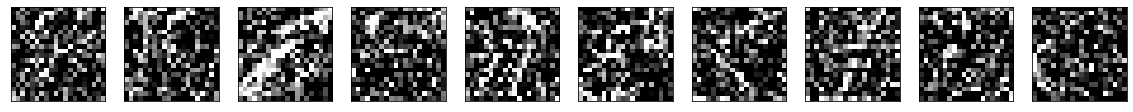

In [62]:
x_train_2d = X = np.reshape(X_train, (-1,20,20,1))
x_test_2d = X = np.reshape(X_test, (-1,20,20,1))



noise_factor = 0.5
x_train_noisy = x_train_2d + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train_2d.shape) 
x_test_noisy = x_test_2d + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test_2d.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)


n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(20, 20))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [63]:
from keras.callbacks import TensorBoard
from keras.models import Model

input_img = Input(shape=(20, 20, 1))  # adapt this if using `channels_first` image data format

x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
denoiser_encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (7, 7, 32)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(denoiser_encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
denoiser_decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

denoiser = Model(input_img, denoiser_decoded)
denoiser.compile(optimizer='adadelta', loss='binary_crossentropy')

In [64]:
denoiser.fit(x_train_noisy, x_train_2d,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test_2d),
                callbacks=[TensorBoard(log_dir='/tmp/denoiser', histogram_freq=0, write_graph=False)])

Train on 445 samples, validate on 1783 samples
Epoch 1/50
445/445 [==============================] - 1s 1ms/step - loss: 0.6784 - val_loss: 0.5971
Epoch 2/50
445/445 [==============================] - 0s 621us/step - loss: 0.5686 - val_loss: 0.5498
Epoch 3/50
445/445 [==============================] - 0s 628us/step - loss: 0.5472 - val_loss: 0.5439
Epoch 4/50
445/445 [==============================] - 0s 635us/step - loss: 0.5390 - val_loss: 0.5271
Epoch 5/50
445/445 [==============================] - 0s 633us/step - loss: 0.5238 - val_loss: 0.5187
Epoch 6/50
445/445 [==============================] - 0s 639us/step - loss: 0.5156 - val_loss: 0.5049
Epoch 7/50
445/445 [==============================] - 0s 627us/step - loss: 0.5027 - val_loss: 0.5083
Epoch 8/50
445/445 [==============================] - 0s 638us/step - loss: 0.5058 - val_loss: 0.5102
Epoch 9/50
445/445 [==============================] - 0s 613us/step - loss: 0.5130 - val_loss: 0.4970
Epoch 10/50
445/445 [================

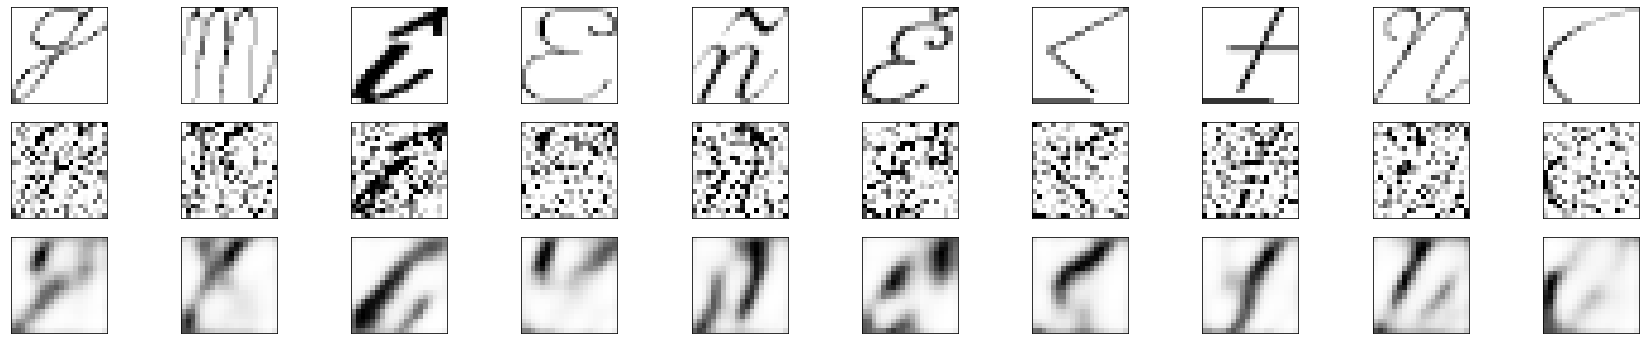

In [65]:
denoised_images = denoiser.predict(x_test_noisy)

n = 10  # how many digits we will display
plt.figure(figsize=(30, 6))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test_2d[i].reshape(20, 20), cmap="Greys", interpolation=None)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # noisy version
    ax = plt.subplot(3, n, n+ i + 1)
    plt.imshow(x_test_noisy[i].reshape(20, 20), cmap="Greys", interpolation=None)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display denoised version
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(denoised_images[i].reshape(20, 20), cmap="Greys", interpolation=None)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()